In [1]:
!pip install normalize_text

ERROR: Could not find a version that satisfies the requirement normalize_text (from versions: none)
ERROR: No matching distribution found for normalize_text

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.stem.isri import ISRIStemmer
import string
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from tashaphyne.stemming import ArabicLightStemmer
import pyarabic.araby as araby
import unicodedata


from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
nltk.download('stopwords')
nltk.download('punkt')
# read csv file and save it in a data frame
data_df= pd.read_csv(r"C:\Users\moner\Downloads\cleaned_thefinaldataset monerah.csv")
import pyarabic.araby as araby
data_df.head()
#Drop any rows with missing values in the LABEL
data_df.dropna(subset=['LABEL'], inplace=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
data_df['LABEL'].value_counts()

3    3389
2    2067
0    1755
1      97
Name: LABEL, dtype: int64

In [36]:
# Drop any duplicate rows based on the tweet column
data_df.drop_duplicates(keep='first', inplace=True)
data_df.drop_duplicates(subset='tweet', keep='first', inplace=True)

In [37]:
data_df['tweet']

0       @TRTArabi اولاً الله يوفقهم ان شاءالله\r\nوثان...
1       @llms_ma ألاحظ شكثر الحريم اللي يمشون على ممشى...
2       @saam___99 حلو بما اننه عجبتش الرياضة استمري ف...
3       @fahadlghofaili طيب يا غبي مصارعة الحريم للحري...
4        اذا مافيه إلا هاالعلاج مالك الاتصبرين كم شهر ...
                              ...                        
7303    احب اقولك بعيد عن شعارتكم الز..يف هي البنت هي ...
7304    \nوالجريدة ما حصلت غير سوالف عن الحريم ورياضته...
7305    اتفق جدا، مع تقديري واحترامي الشديد لكل العابر...
7306    ومن قالك ان الرياضة مخصصه لرجال \nحتى الحرمة ا...
7307    يعني مسوي انك قوي ويالله على المطبخ الحرمه مكا...
Name: tweet, Length: 7308, dtype: object

In [38]:
my_emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "🤭":"حياء",  
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يضحك",
    "😢":"حزن",
    "😔":"حزن", 
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"مرتاح",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماس",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان", 
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",   
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",  
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",    
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",    
    "🎀":    "ورده",
    "💵":  "فلوس",   
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب", 
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",  
    "😬":"عدم الراحة",   
    "👊🏿":"يضرب",    
    "🌿":"ورقه شجره",     
    "✋🏼":"كف ايد",    
    "👐":"ايدي مفتوحه",      
    "☠️":"وجه مرعب",     
    "🎉":"يهنئ",      
    "🔕" :"صامت",
    "😿":"وجه حزين",      
    "☹️":"وجه يائس",
    "😘" :"حب",     
    "😰" :"خوف و حزن",
    "🌼":"ورده",      
    "💋":  "بوسه",
    "👇":"لاسفل",     
    "❣️":"حب",     
    "🎧":"سماعات",
    "📝":"يكتب",      
    "😇":"ملاك",      
    "😈":"رعب",      
    "🏃":"يجري",      
    "✌🏻":"علامه النصر",    
    "🔫":"يضرب",      
    "❗️":"تعجب",
    "👎":"غير موافق",      
    "🔐":"قفل",      
    "👈":"لليمين",
    "™":"رمز",    
    "🚶🏽":"يتمشي",    
    "😯":"متفاجأ",  
    "✊":"يد مغلقه",    
    "😻":"اعجاب",    
    "🙉" :"قرد",    
    "👧":"طفله صغيره",     
    "🔴":"دائره حمراء",      
    "🏽":"قوه",     
    "💤":"ينام",     
    "👀":"ينظر",     
    "✍🏻":"يكتب",  
    "❄️":"تلج",
    "💀":"رعب",   
    "😤":"وجه عابس",      
    "🖋":"قلم",      
    "🎩":"كاب",      
    "☕️":"قهوه",     
    "😹":"ضحك",     
    "💓":"حب",      
    "☄️ ":"نار",     
    "👻":"رعب",
    "🤣":"ضحك",
    }

In [39]:
# Remove special characters
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    if isinstance(text, str):
        # Replace underscore (_) with a space before removing other punctuations
        text = text.replace('_', ' ')
        translator = str.maketrans('', '', punctuations_list)
        text = re.sub(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~]', ' ', text)
        return text.strip()  # Remove leading and trailing spaces
    else:
        return text  # Return the input value if it's not a string
# Tokenization

def tokenize_tweet(tweet):
    if isinstance(tweet, str):
        # Tokenize the tweet into individual words
        tokens = nltk.word_tokenize(tweet)
        return tokens
    else:
        return []

def remove_stop_words(text):
    stop_words = set(stopwords.words('arabic'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return " ".join(words)

def remove_non_arabic(text):
    return re.sub(r'[^\u0600-\u06FF\s]', '', text)

# stemming
def stem_tokens(tokens):
    stemmer = ArabicLightStemmer()
    stemmed = [stemmer.light_stem(token) for token in tokens]
    return ' '.join(stemmed)

# Normalization
def normalize_arabic(text):
    text = text.strip()
#     text = re.sub('[إأآ]', 'ا', text)  # Normalize Alef characters
#     text = re.sub('[ٱٲٳإ]', 'ا', text)  # Normalize special Alef characters

#     text = re.sub('[ة]', 'ه', text)  # Normalize Ta Marbuta characters to Ha




    # Normalize Arabic text by removing diacritics and normalizing characters
    text = unicodedata.normalize('NFKD', text)
    text = re.sub(r'[\u0610-\u061A\u064B-\u0652\u06D6-\u06DC\u06DF\u06E0\u06E4-\u06E7\u06E9\u06EA\u06ED]', '', text)
  



    
    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text) 
    
    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)
    
    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    
    # remove repeated letters
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    
    return text.strip()  # Remove leading and trailing spaces
import re

def convert_emojis(tweet):
    if isinstance(tweet, str):
        for emot in my_emojis:
            pattern = re.escape(emot)  # Escape special characters in emot
            replacement = " ".join(my_emojis[emot].replace(",", "").replace(":", "").split())
            tweet = re.sub(f'({pattern})(?!\w)', rf' {replacement} ',tweet)
        return tweet
    else:
        return tweet if tweet is not None else ""
def processPost(tweet):
    # Convert emojis
    tweet = convert_emojis(tweet)
    
    # Remove punctuations from the tweet
    tweet = remove_punctuations(tweet)

    # Tokenize the cleaned tweet
    tokens = tokenize_tweet(tweet)
    
    # Remove non-Arabic characters
    tokens = remove_non_arabic(' '.join(tokens)).split()

    # Normalize Arabic text
    tokens = normalize_arabic(' '.join(tokens)).split()
    
    return ' '.join(tokens)  # Join the processed words back into a single string

data_df['clean_text'] = data_df['tweet'].apply(processPost)

In [7]:
data_df.to_csv ('cleaned_50Tweet0.csv',encoding='utf-8-sig')

In [40]:
# remove the "unwanted" class
data_df['LABEL'] = data_df['LABEL'].astype(int)
data_df = data_df[(data_df['LABEL'] != 3) & (data_df['LABEL'] != 1)]

In [52]:
import pandas as pd

# Set the maximum column width to display full text
pd.set_option('display.max_colwidth', None)

# Display the first 3 rows with full text in 'clean_text' and 'tweet' columns
data_df[['clean_text', 'tweet']].head(3)


clean_text  \
0  اولا الله يوفقهم ان شاءالله وثانيا الرياضة شي جميل وليس محرم على الجنسين سوا الرجال او الحريم ولكن الفيديو هذا ليس بالسعودية نهايي هذا فيديو خليط منوع من اللقطات من تركيا ولقطة من مدرب امريكي فقط ؟   
1                                                                                           الاحظ شكثر الحريم اللي يمشون على ممشى البحر وفي الحدايق التفكير فعلا تغير وصارت الناس كلها تمشي وتحب الرياضة   
2                                                                   حلو بما اننه عجبتش الرياضة استمري فيها وما بس مشي لعبي كورة ان شاء الله كذا نشوفش لاعبة فمنتخبنا مال الحريم يضحك يضحك يضحك يضحك يضحك   

                                                                                                                                                                                                                           tweet  
0  @TRTArabi اولاً الله يوفقهم ان شاءالله\r\nوثانياً الرياضة شي جميل وليس محرم على الجنسين سوا الرجال او الحريم\r\nولكن الفيديو هذا ليس بالسعودية نهائي\r\nهذا فيديو خليط منوع من اللقطات من تركيا ولقطة من مدرب امريكي فقط...!؟  
1                                                                                                         @llms_ma ألاحظ شكثر الحريم اللي يمشون على ممشى البحر وفي الحدايق التفكير فعلاً تغير وصارت الناس كلها تمشي وتحب الرياضة  
2                                                                                                  @saam___99 حلو بما اننه عجبتش الرياضة استمري فيها وما بس مشي لعبي كورة  ان شاء الله كذا نشوفش لاعبة فمنتخبنا مال الحريم 😂😂😂😂😂

In [10]:
# Separate features and labels
x = data_df['clean_text']
y = data_df['LABEL']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [11]:
from sklearn.metrics import classification_report, accuracy_score
# Train Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       552
           2       0.80      0.84      0.82       595

    accuracy                           0.81      1147
   macro avg       0.81      0.81      0.81      1147
weighted avg       0.81      0.81      0.81      1147

Test Accuracy: 0.8125544899738448


In [32]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler

def balance__classes(X, y):
    sampler = RandomUnderSampler(random_state=40)
    X_balanced, y_balanced = sampler.fit_resample(X, y)
    return X_balanced, y_balanced

# Balance the classes by undersampling the majority class
X_train_balanced, y_train_balanced = balance__classes(X_train, y_train)

# Encode the target variable as binary values
label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train_balanced)

# Train XGBoost classifier with balanced classes
clf = xgb.XGBClassifier(scale_pos_weight=(y_train_binary == 0).sum() / (y_train_binary == 1).sum())
clf.fit(X_train_balanced, y_train_binary)

# Encode the test set labels as binary values
y_test_binary = label_encoder.transform(y_test)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test_binary, y_pred))
accuracy = accuracy_score(y_test_binary, y_pred)
print("Test Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       552
           1       0.83      0.92      0.87       595

    accuracy                           0.86      1147
   macro avg       0.87      0.86      0.86      1147
weighted avg       0.87      0.86      0.86      1147

Test Accuracy: 0.8613775065387969


In [13]:
# Train Support Vector Machine classifier
clf = SVC(kernel='linear', C=3)
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test , y_pred)
print("Test Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       552
           2       0.83      0.90      0.86       595

    accuracy                           0.85      1147
   macro avg       0.86      0.85      0.85      1147
weighted avg       0.86      0.85      0.85      1147

Test Accuracy: 0.8535309503051438


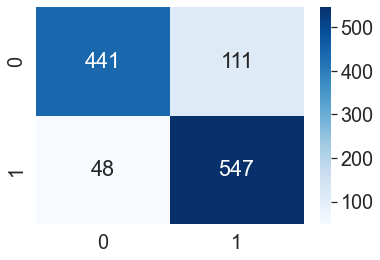

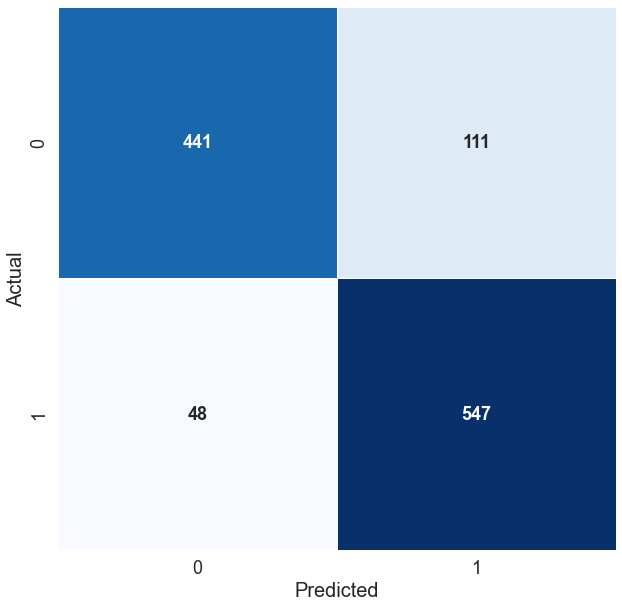

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Create a confusion matrix with the correct labels
cm = confusion_matrix(y_test_binary, y_pred)

# Create a heatmap using Seaborn and specify the tick labels
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.8)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 18, "weight": "bold"}, linewidths=0.5,
            xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=40)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test , y_pred)
print("Test Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       552
           2       0.79      0.95      0.87       595

    accuracy                           0.85      1147
   macro avg       0.86      0.84      0.84      1147
weighted avg       0.86      0.85      0.84      1147

Test Accuracy: 0.8465562336530078
